In [61]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import pims
import pandas as pd

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 16
from matplotlib.animation import FuncAnimation
# import matplotlib.pyplot as plt
# from numba import njit
from scipy.optimize import curve_fit
import os


In [ ]:
group_trajs = pd.read_csv('data/group-trajectories/group_traj_video1_wspeedsd.csv')
dataframe = group_trajs.drop(columns=['Unnamed: 0'])
dataframe['Group'].unique()

,Track ID,x (micron),y (micron),t (sec),Frame,Group,Classification,squared displacement,dt,vx,vy,speed
0,21,9.218501,90.897508,0.000000,0,A,P,0.000000,NaN,NaN,NaN,NaN
1,21,9.218501,90.691508,3.334563,1,A,P,0.042436,1.0,0.000000,-0.061769,0.061769
2,21,9.270001,90.588508,6.669126,2,A,P,0.098133,1.0,0.015442,-0.030885,0.034530
3,21,9.321501,90.382508,10.003688,3,A,P,0.275834,1.0,0.015442,-0.061769,0.063670
4,21,9.270001,90.382508,13.338251,4,A,P,0.267877,1.0,-0.015442,0.000000,0.015442
...,...,...,...,...,...,...,...,...,...,...,...,...
4563,78,67.014381,39.346004,650.239749,195,H,P,292.330837,1.0,0.015442,0.003861,0.015918
4564,78,67.439256,39.268753,653.574312,196,H,P,303.765892,1.0,0.127399,-0.023163,0.129487
4565,78,67.683881,39.346004,656.908874,197,H,P,312.590206,1.0,0.073351,0.023163,0.076921
4566,78,68.134506,39.449004,660.243437,198,H,P,328.506864,1.0,0.135120,0.030885,0.138605


In [ ]:
trajs = dataframe[dataframe['Group']=='A']
# a = trajs[trajs['Track ID']==22]['Frame']
# b=trajs[trajs['Track ID']==21]['Frame']
# a
a = pd.concat([trajs[trajs.duplicated('Frame',keep='last')],trajs[trajs.duplicated('Frame',keep='first')]])
a[a['Track ID']==22]

,Track ID,x (micron),y (micron),t (sec),Frame,Group,Classification,squared displacement,dt,vx,vy,speed
124,22,12.308501,92.820175,16.672814,5,A,P,0.000000,NaN,NaN,NaN,NaN
125,22,11.896501,92.579842,20.007377,6,A,P,0.227504,1.0,-0.123538,-0.072064,0.143021
126,22,11.278501,92.545508,23.341940,7,A,P,1.136342,1.0,-0.185307,-0.010295,0.185593
127,22,10.351501,92.236508,26.676503,8,A,P,4.170517,1.0,-0.277961,-0.092654,0.292997
128,22,9.767834,91.824508,30.011065,9,A,P,7.446341,1.0,-0.175013,-0.123538,0.214222
...,...,...,...,...,...,...,...,...,...,...,...,...
238,22,48.049504,84.099507,396.812975,119,A,P,1353.469349,1.0,-0.133833,0.010295,0.134228
239,22,48.186838,84.236841,400.147538,120,A,P,1360.928656,1.0,0.041179,0.041179,0.058236
240,22,48.461504,84.477174,403.482101,121,A,P,1376.645302,1.0,0.082359,0.072064,0.109436
241,22,48.804838,84.889174,406.816663,122,A,P,1394.883356,1.0,0.102949,0.123538,0.160811


Speed calculation


In [8]:
dataframe = group_trajs
ids = dataframe['Track ID'].unique()

def calculate_sd(x, y, x0, y0):
    delta_x = x - x0
    delta_y = y - y0
    sq = delta_x**2 + delta_y**2
    return sq

# Group by 'Track ID' and calculate the initial positions
initial_positions = dataframe.groupby('Track ID').first().reset_index()

# Initialize a column for the principal angle
dataframe['squared displacement'] = 0.0

# Calculate the principal angle for each row
for index, row in dataframe.iterrows():
    track_id = row['Track ID']
    initial_row = initial_positions[initial_positions['Track ID'] == track_id].iloc[0]
    x0, y0 = initial_row['x (micron)'],initial_row['y (micron)']
    angle = calculate_sd(row['x (micron)'], row['y (micron)'], x0, y0)
    dataframe.at[index, 'squared displacement'] = angle
    

dataframe['dt'] = dataframe.groupby('Track ID')['Frame'].diff()
dataframe['vx'] = dataframe.groupby('Track ID')['x (micron)'].diff() / (dataframe['dt']*3.335)
dataframe['vy'] = dataframe.groupby('Track ID')['y (micron)'].diff() / (dataframe['dt']*3.335)
dataframe['speed'] = np.sqrt(dataframe['vx']**2 + dataframe['vy']**2)


# dataframe = dataframe.drop(columns=['Unnamed: 0'])
dataframe.to_csv('data/group-trajectories/group_traj_video1_wspeedsd.csv')

In [81]:

groups = sorted(dataframe['Group'].unique())
groups[len(groups)-4:len(groups)-2]

['I', 'J']

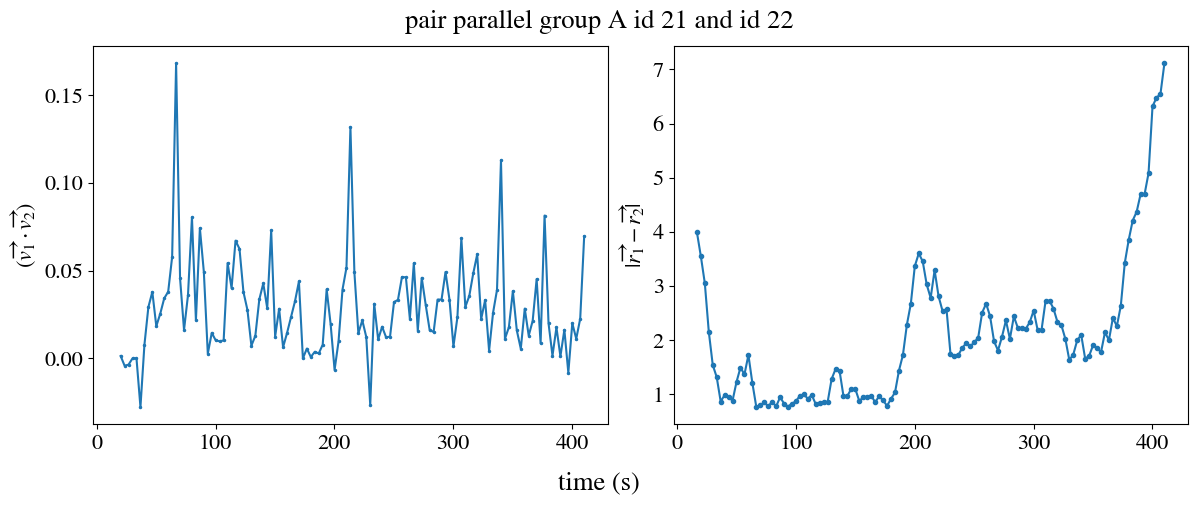

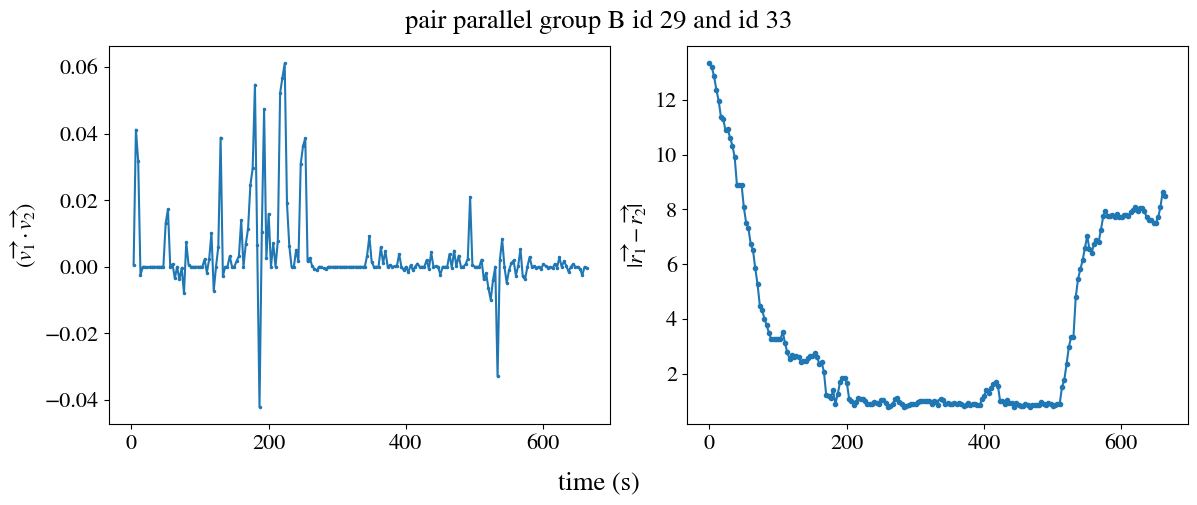

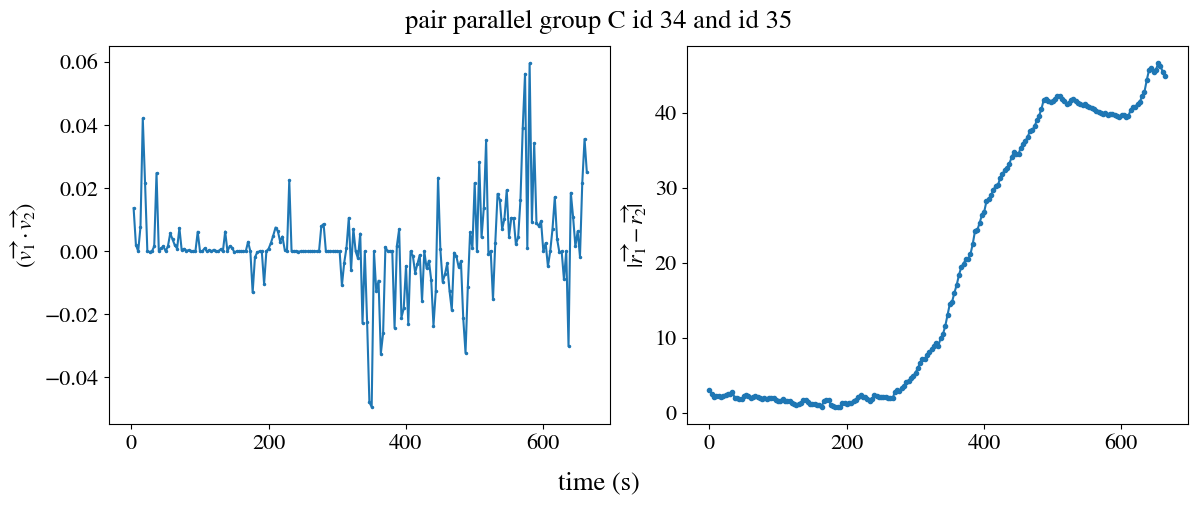

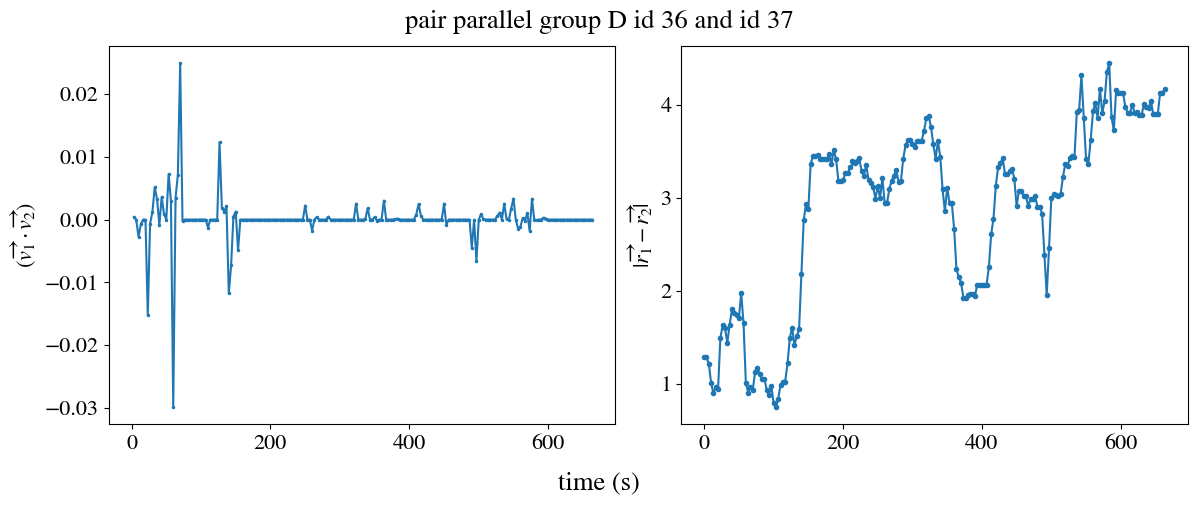

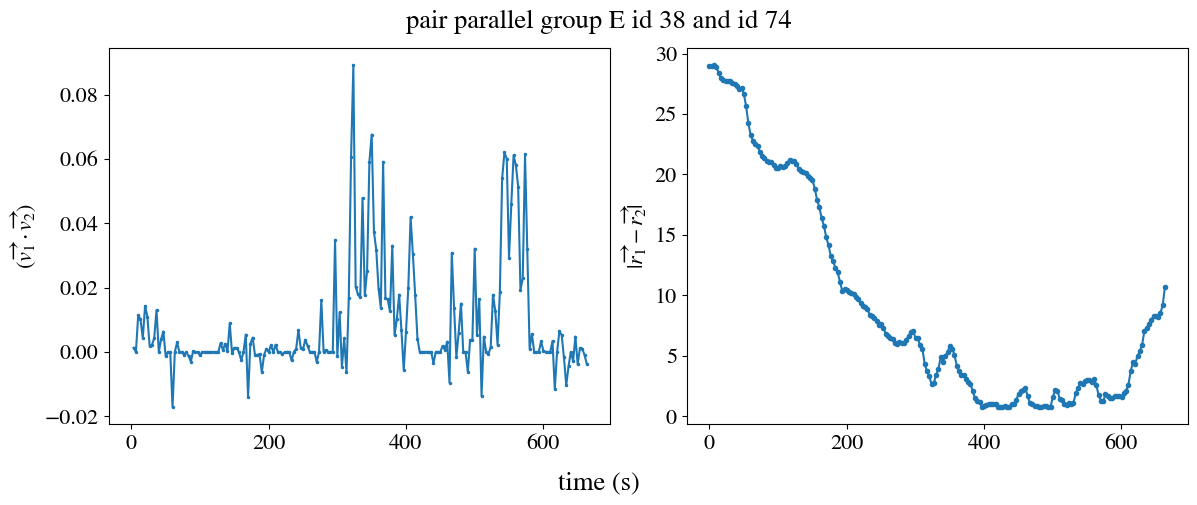

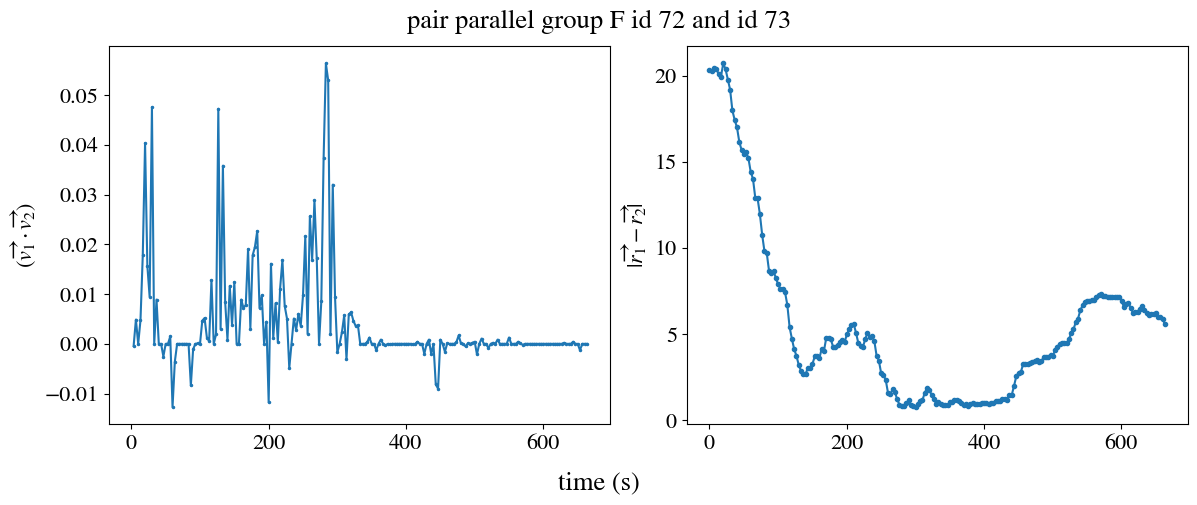

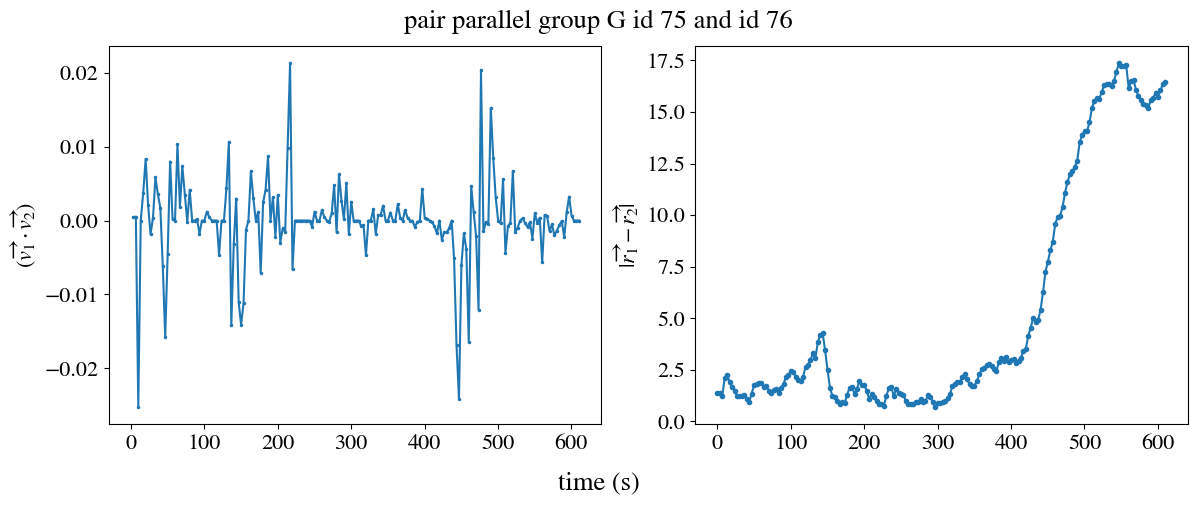

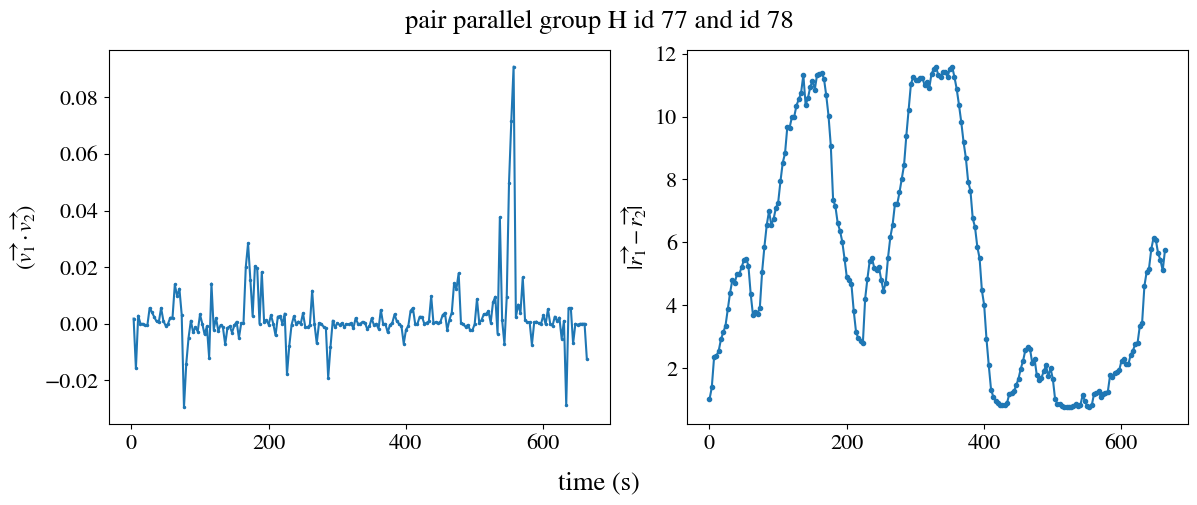

In [95]:
for group in groups[:len(groups)-4]:
    trajs = dataframe[dataframe['Group']==group]
    # a = pd.concat([trajs[trajs.duplicated('Frame',keep='last')],trajs[trajs.duplicated('Frame',keep='first')]])
    ids = trajs['Track ID'].unique()

    if len(ids) < 3:
        id1,id2 = ids[0],ids[1]
        a = pd.concat([trajs[trajs.duplicated('Frame',keep='last')],trajs[trajs.duplicated('Frame',keep='first')]])
        part1,part2 = a[a['Track ID'] == ids[0]].sort_values('Frame'),a[a['Track ID'] == ids[1]].sort_values('Frame')
        
        # if part1['Frame'].max() != part2['Frame'].max():
        #     min_frames = min(part1['Frame'].max(),part2['Frame'].max())
        #     part1 = part1[part1['Frame']<min_frames]
        #     part2 = part2[part2['Frame']<min_frames]
        

            
        cross_correlation_equal_time = part1['vx'].values*part2['vx'].values + part1['vy'].values*part2['vy'].values
        distance_equal_time = np.sqrt((part1['x (micron)'].values-part2['x (micron)'].values)**2 + (part1['y (micron)'].values-part2['y (micron)'].values)**2)

        time = a[a['Track ID']==ids[0]]['t (sec)']
        
    fig,ax = plt.subplots(1,2,sharex=True,figsize=(12,5),sharey=False)

    ax[0].plot(time, cross_correlation_equal_time, marker='o',ms=1.5)
    ax[1].plot(time, distance_equal_time,marker='o',ms=3)
    # plt.tick_params(labelcolor='none', which='', top=False, bottom=False, left=False, right=False)
    ax[0].set_ylabel(r'$(\overrightarrow{v_1}\cdot\overrightarrow{v_2})$')
    ax[1].set_ylabel(r'$|\overrightarrow{r_1}-\overrightarrow{r_2}|$')


    fig.suptitle(f'pair parallel group {group} id {id1} and id {id2}')
    fig.supxlabel('time (s)')

    # 

    plt.tight_layout(pad=0.5)
    # plt.savefig(f'data/55_tracks/pairs_config_analysis/ids_{id1}and{id2}_correlation_distance.png',dpi=200)
    plt.show()

video


TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offs

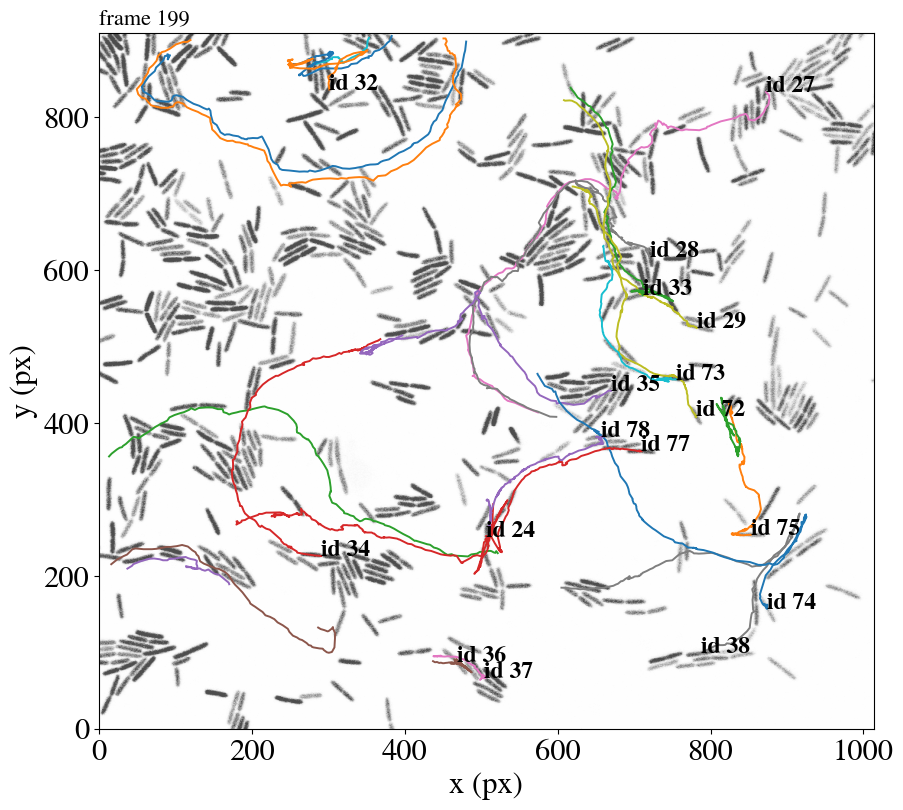

In [94]:
frames = pims.open('data/group-trajectories/frames/*.tif')
ids = dataframe['Track ID'].unique()
pairs = [(list(), list()) for _ in range(len(ids))]
x1, y1 = zip(*pairs)
fig_movie, ax_movie = plt.subplots(figsize=(10,10))

# for frame in range(frames):
for frame in range(200):
    ax_movie.clear()
    # print(f'frame {frame}')
    ax_movie.imshow(frames[frame],cmap='Greys',alpha=0.7,origin='lower')
    for i,id in enumerate(ids):
        
        traj= dataframe[dataframe['Track ID'] == id].sort_values('Frame')
        first_frame = min(traj['Frame'].values)
        # aux_this_frame = traj[traj['Frame'] == frame]
        
        # print(traj.values.shape[0],frame)
        
        if (frame < traj.values.shape[0]) and (first_frame <= frame):
            X = traj[traj['Frame'] == frame]['x (micron)'].values[0]
            Y = traj[traj['Frame'] == frame]['y (micron)'].values[0]
            x1[i].append(X*9.7087)
            y1[i].append(Y*9.7087)
            ax_movie.annotate(f'id {int(id)}',xy=(x1[i][-1],y1[i][-1]),fontsize=17,color='black',weight='bold')
            
        # print(i,id,x1[i],y1[i])
        ax_movie.plot(x1[i],y1[i],marker='o', mfc='none',ms=0, lw=1.4)
        
    
    ax_movie.set_xlabel(r'x (px)',fontsize=22)
    ax_movie.set_ylabel(r'y (px)',fontsize=22)
    ax_movie.set_title(f'frame {frame}',fontsize=16,loc='left')

    ax_movie.tick_params(axis='both', labelsize=22)
    # plt.tight_layout()
    plt.savefig(f'data/group-trajectories/frames/frame2_{frame:03d}.png',dpi=200,bbox_inches="tight")
    # plt.show()
        
# ani = FuncAnimation(fig_movie,animate, frames=150, interval=30, repeat=False)

# HTML(ani.to_jshtml())     